In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

# Load data into a pandas dataframe
df = pd.read_csv('../data/subscriberClean.csv')

# Encode categorical variables using LabelEncoder
cat_cols = ['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df[['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']]

# Define number of clusters
n_clusters = 4

# Initialize AgglomerativeClustering algorithm with caching
ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')

# Fit the data to the algorithm
ac.fit(X)

# Add cluster labels to the dataframe
df['Cluster'] = ac.labels_

# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


                   ID   Language  Subscription Type  Purchase Amount  \
Cluster                                                                
0        19874.674084   8.791498           0.831465        71.530709   
1        21300.144628   5.605935           0.879790        60.140574   
2         8631.875000  25.375000           1.000000        59.103691   
3        20498.606808  20.572770           0.929577        51.504755   

           Country  User Type  Lead Platform  Send Count  Open Count  \
Cluster                                                                
0        42.622690   0.310470       0.913368   32.991083    7.898370   
1         9.770473   0.475958       1.163035   20.846032   11.623810   
2        27.125000   0.125000       0.125000    1.000000    0.000000   
3         9.603286   0.453052       1.142019   28.343750   20.557292   

         Click Count  Unique Open Count  Unique Click Count  
Cluster                                                      
0         

G:\TempForDownloads\ipykernel_12540\2379324069.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


In [2]:
# df.to_csv('../data/cluster_ac.csv')

TypeError: Linkage matrix 'Z' must contain doubles.

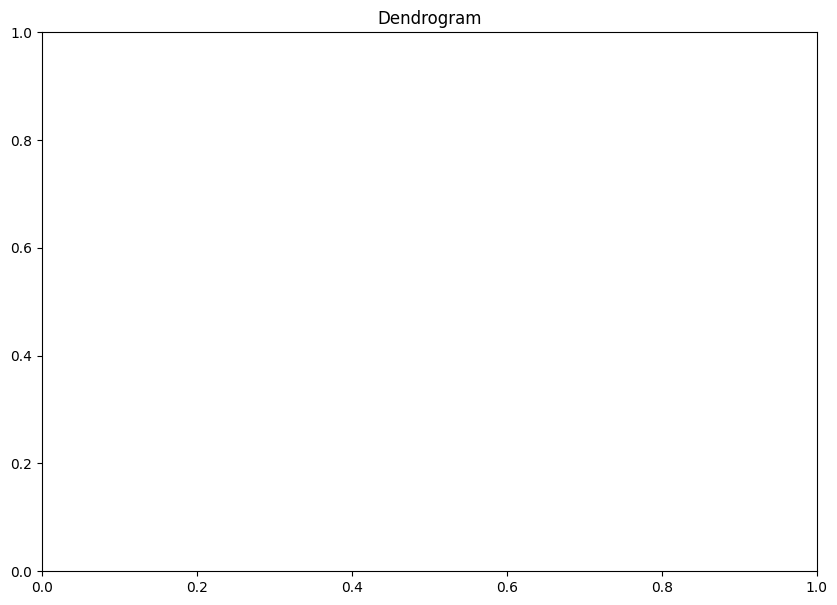

In [3]:
from scipy.cluster.hierarchy import dendrogram

# Create dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(ac.fit(X), truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()